# 3D grasp optimization with three fingers - MPC

## Problem definition

In [37]:
include("ex9_data_mpc.jl");

## Load tools

In [38]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true
@load_file "ex9_plotting.jl" false;

## Run MPC

In [39]:
timeit_var = mpc_utils.execute_mpc_v2!(:warm_feas,true);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
        1        |  4.497368e-04 |      4.986e-03      |      3.40e+01      |   OPTIMAL
        2        |  4.138356e-04 |      1.417e-03      |      6.24e+01      |   SLOW_PROGRESS
        3        |  4.431957e-04 |      1.043e-03      |      2.85e+01      |   OPTIMAL
        4        |  4.309385e-04 |      1.523e-03      |      4.33e+01      |   OPTIMAL
        5        |  4.403361e-04 |      3.041e-03      |      4.61e+01      |   OPTIMAL
        6        |  4.278726e-04 |      3.409e-03      |      4.21e+01      |   OPTIMAL
        7        |  4.221026e-04 |      1.658e-03      |      2.90e+01      |   OPTIMAL
        8        |  4.287228e-04 |      1.6

## Visualization

In [40]:
plotter.trajectory3D_matlab(mpc_utils.xmpc,mpc_utils.umpc[1:eX.NN-eX.N],eX.yy_unscl[1:eX.NN-eX.N+1],eX.NN-eX.N+1)

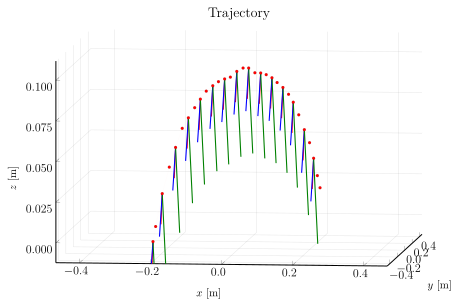

In [41]:
plotter.trajectory3D(mpc_utils.xmpc,mpc_utils.umpc)

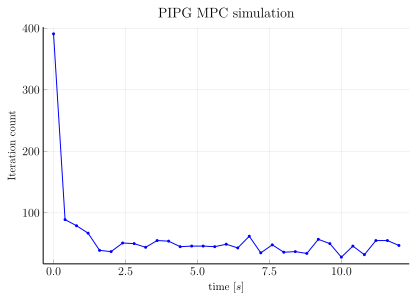

In [42]:
mpc_utils.plot_iter_count()

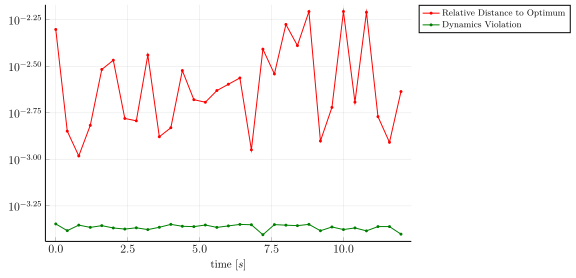

In [43]:
mpc_utils.plot_rd2o_dye()

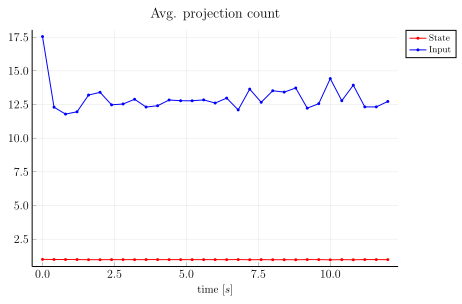

In [44]:
mpc_utils.plot_cum_proj()

## Benchmark MPC

In [45]:
show(timeit_var)

 ────────────────────────────────────────────────────────────────────────────
                                     Time                   Allocations      
                             ──────────────────────   ───────────────────────
      Tot / % measured:           12.9s / 20.0%            719MiB / 78.4%    

 Section             ncalls     time   %tot     avg     alloc   %tot      avg
 ────────────────────────────────────────────────────────────────────────────
 JuMP                    31    2.44s  94.1%  78.7ms    518MiB  92.0%  16.7MiB
 PIPG (diagnostic)       31    153ms  5.91%  4.94ms   45.4MiB  8.05%  1.46MiB
 Power iteration          1    135μs  0.01%   135μs     0.00B  0.00%    0.00B
 Warm-start              31   72.8μs  0.00%  2.35μs   3.88KiB  0.00%     128B
 ────────────────────────────────────────────────────────────────────────────